In [1]:
import pandas as pd
import json
from functools import reduce
import functools

In [2]:
with open ("output_clean_date_technical.json") as f:
    json_data = json.load(f)

In [3]:
list(json_data.keys())

['financialGrowth',
 'ratios',
 'cashFlowStatementGrowth',
 'incomeStatementGrowth',
 'balanceSheetStatementGrowth',
 'historicalPriceFull',
 'tech5',
 'tech20',
 'tech60',
 'tech252']

# <span style="color:red">financialGrowth</span>
<span style="color:red">以季度為單位，公司在不同財務方面的成長情況。</span>
# <span style="color:red">ratios</span>
<span style="color:red">以季度為單位，財務比率，這些比率常用於評估公司的財務健康狀況和表現。常見的財務比率有流動比率、速動比率、資產負債比率、毛利率、淨利率、ROE（股東權益報酬率）等。</span>
# <span style="color:red">cashFlowStatementGrowth</span>
<span style="color:red">以季度為單位，「現金流量表」的成長數據</span>
# <span style="color:red">incomeStatementGrowth</span>
<span style="color:red">以季度為單位，損益表的成長數據</span>
# <span style="color:red">balanceSheetStatementGrowth</span>
<span style="color:red">以季度為單位，「資產負債表」的成長數據</span>
# <span style="color:red">historicalPriceFull</span>
<span style="color:red">以日為單位，表該檔股票的完整歷史價格數據，包括開盤價、收盤價、最高價、最低價、交易量等。</span>
# <span style="color:red">tech5</span>
<span style="color:red">以日為單位，5天移動平均線的技術分析數據。</span>
# <span style="color:red">tech20</span>
<span style="color:red">以日為單位，20天移動平均線的技術分析數據。</span>
# <span style="color:red">tech60</span>
<span style="color:red">以日為單位，60天移動平均線的技術分析數據。</span>
# <span style="color:red">tech252</span>
<span style="color:red">以日為單位，252天（年）移動平均線的技術分析數據。</span>


# <h1>處理以季度為單位的資料</h1>

In [4]:
financialGrowth_df = pd.DataFrame(json_data["financialGrowth"])      #觀察shape
ratios_df = pd.DataFrame(json_data["ratios"])
cashFlowStatementGrowth_df = pd.DataFrame(json_data["cashFlowStatementGrowth"])
incomeStatementGrowth_df = pd.DataFrame(json_data["incomeStatementGrowth"])
balanceSheetStatementGrowth_df = pd.DataFrame(json_data["balanceSheetStatementGrowth"])
print(f"shape financialGrowth_df:{financialGrowth_df.shape}")
print(f"shape ratios_df:{ratios_df.shape}")
print(f"shape cashFlowStatementGrowth_df:{cashFlowStatementGrowth_df.shape}")
print(f"shape incomeStatementGrowth_df:{incomeStatementGrowth_df.shape}")
print(f"shape balanceSheetStatementGrowth_df:{balanceSheetStatementGrowth_df.shape}")

shape financialGrowth_df:(12, 38)
shape ratios_df:(12, 58)
shape cashFlowStatementGrowth_df:(12, 34)
shape incomeStatementGrowth_df:(12, 30)
shape balanceSheetStatementGrowth_df:(12, 43)


In [5]:
#利用集合看季度資料是否有相同的欄位  
financialGrowth_columns = set(financialGrowth_df.columns)
ratios_columns = set(ratios_df.columns)
cashFlowStatementGrowth_columns = set(cashFlowStatementGrowth_df.columns)
incomeStatementGrowth_columns = set(incomeStatementGrowth_df.columns)
balanceSheetStatementGrowth_columns = set(balanceSheetStatementGrowth_df.columns)
financialGrowth_columns.intersection(ratios_columns).\
    intersection(cashFlowStatementGrowth_columns).\
    intersection(incomeStatementGrowth_columns).\
    intersection(balanceSheetStatementGrowth_columns)

{'calendarYear', 'date', 'period', 'symbol'}

In [6]:
#將季度資料合併
season_df_list = [financialGrowth_df, ratios_df, cashFlowStatementGrowth_df, incomeStatementGrowth_df, balanceSheetStatementGrowth_df]
season_df_tag = ["_financialGrowth","_ratios","_cashFlowStatementGrowth","_incomeStatementGrowth","_balanceSheetStatementGrowth"]
season_df = functools.reduce(
    lambda l,r:l.merge(r,
                        left_on=['calendarYear', 'date', 'period', 'symbol'],
                        right_on=['calendarYear', 'date', 'period', 'symbol'],
                        how = "outer"),
    season_df_list)
print(f"shpae season_df:{season_df.shape}")
print("季度資料合併後NA值數量:",season_df.isna().sum().sum())

shpae season_df:(12, 187)
季度資料合併後NA值數量: 0


In [7]:
season_df.head()

,symbol,date,calendarYear,period,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
0,1101.TW,2021-01-31,2020,Q4,0.077498,-0.017066,-0.060434,-0.060434,-0.104454,-0.118644,...,-0.006729,0.011993,0.100692,0,0.047958,0.055166,0.026621,-0.041090,-0.025107,-0.126830
1,1101.TW,2021-04-30,2021,Q1,-0.313870,-0.467413,-0.505282,-0.505282,-0.504044,-0.500000,...,-0.036521,0.025332,0.039989,0,0.031521,0.032529,0.001455,-0.004937,-0.081935,-0.248028
2,1101.TW,2021-07-30,2021,Q2,0.269904,0.558205,0.674078,0.674078,1.269705,0.980769,...,-0.043577,0.027888,0.114304,0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927
3,1101.TW,2021-10-30,2021,Q3,-0.039459,-0.398781,-0.452565,-0.452565,-0.471069,-0.475728,...,0.147402,0.000101,-0.201696,0,0.031308,-0.070147,0.035005,0.004984,0.195354,0.537450
4,1101.TW,2022-01-31,2021,Q4,0.121096,0.418260,0.985599,0.985599,0.360230,0.370370,...,0.197107,0.000169,0.077151,0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378


# <h1>處理以日為單位的資料</h1>

In [8]:
json_data["historicalPriceFull"]["symbol"]  #確認歷史資料的symbol只有一檔股票 1101.TW

'1101.TW'

In [9]:
historicalPriceFull_df = pd.DataFrame(json_data["historicalPriceFull"]["historical"])
tech5_df = pd.DataFrame(json_data["tech5"])
tech20_df = pd.DataFrame(json_data["tech20"])
tech60_df = pd.DataFrame(json_data["tech60"])
tech252_df = pd.DataFrame(json_data["tech252"])
print(f"shape historicalPriceFull_df:{historicalPriceFull_df.shape}")
print(f"shape tech5_df:{tech5_df.shape}")
print(f"shape tech20_df:{tech20_df.shape}")
print(f"shape tech60_df:{tech60_df.shape}")
print(f"shape tech252:{tech252_df.shape}")

shape historicalPriceFull_df:(736, 13)
shape tech5_df:(736, 15)
shape tech20_df:(736, 15)
shape tech60_df:(736, 15)
shape tech252:(736, 15)


In [10]:
#日期格式不同，故重新調整
tech5_df["date"] = tech5_df["date"].str.split(" ").str[0]
tech20_df["date"] = tech20_df["date"].str.split(" ").str[0]
tech60_df["date"] = tech60_df["date"].str.split(" ").str[0]
tech252_df["date"] = tech252_df["date"].str.split(" ").str[0]

In [11]:
historicalPriceFull_columns = set(historicalPriceFull_df.columns)
tech5_columns = set(tech5_df.columns)
tech20_columns = set(tech20_df.columns)
tech60_columns = set(tech60_df.columns)
tech252_columns = set(tech252_df.columns)
print("以日為單位之資料共有的欄位名稱:")
print(historicalPriceFull_columns.intersection(tech5_columns).\
    intersection(tech20_columns).\
    intersection(tech60_columns).\
    intersection(tech252_columns))
print("檢查技術指標資料之欄位名稱完全相同")
tech5_columns==tech20_columns==tech60_columns==tech252_columns

以日為單位之資料共有的欄位名稱:
{'high', 'date', 'close', 'low', 'open', 'volume'}
檢查技術指標資料之欄位名稱完全相同


True

In [12]:
###檢查完整歷史價錢資料與技術指標之'close', 'high', 'low', 'open', 'volume'欄位之值是否相同
tech_df_list = [tech5_df , tech20_df , tech60_df , tech252_df]
tech_df_tag_list = ["_5","_20","_60","_252"]
for i in range(len(tech_df_list)):
    df_combine = historicalPriceFull_df.merge(tech_df_list[i] , 
                                left_on=['close', 'date', 'high', 'low', 'open', 'volume'],
                                right_on=['close', 'date', 'high', 'low', 'open', 'volume'],
                                how="left")
    na_count = df_combine.isna().sum().sum()          
    if na_count ==0:  ##若以這幾個欄位能成功接起來沒有出現遺失值，代表這幾個columns在每個資料集中有重複的，則可以將其去除
        tech_df_list[i].drop(columns=['close', 'high', 'low', 'open', 'volume'],inplace=True) 
        for col in list(tech_df_list[i].columns):
            if col!="date":
                tech_df_list[i].rename(columns={col:col+tech_df_tag_list[i]},inplace=True) #移動平均指標分為5 20 60 252日 將其column 重新命名


In [13]:
# 將以日為單位的技術指標進行合併
date_df = historicalPriceFull_df
for i in range(len(tech_df_list)):
    date_df = date_df.merge(tech_df_list[i],
                            left_on = "date",
                            right_on = "date",
                            how = "outer")        

In [14]:
#將以日為單位的資料加上季度標示
date_df["date"] = pd.to_datetime(date_df["date"])
def period_define_for_date_df(df):  
    year = df["date"].year
    month = df["date"].month
    if 1<=month<=3:
        return(f"{year-1}Q4")         # 因為財報公佈會晚一季，例如 2021年1-3月時，只會知道2020年第四季的財報
    elif 4<=month<=6:                 
        return(f"{year}Q1")
    elif 7<=month<=9:
        return(f"{year}Q2")
    elif 10<=month<=12:
        return(f"{year}Q3")
    else:
        return("others")
date_df["last_quarter_report_period"] = date_df.apply(period_define_for_date_df,axis=1)

In [15]:
#將以季度為單位的資料加上季度標示(以當下知道的財報為準)
season_df["date"] = pd.to_datetime(season_df["date"])
season_df["calendarYear"] = season_df["calendarYear"].astype(int)
def period_define_for_season_df(df):
    if df["period"]=="Q1":             
        return(f"{df["calendarYear"]-1}Q4")        
    elif df["period"]=="Q2":
        return(f"{df["calendarYear"]}Q1")
    elif df["period"]=="Q3":
        return(f"{df["calendarYear"]}Q2")
    elif df["period"]=="Q4":
        return(f"{df["calendarYear"]}Q3")
    else:
        return("others")
season_df["last_quarter_report_period"] = season_df.apply(period_define_for_season_df,axis=1)

In [16]:
season_df.drop(columns=["date"],inplace=True)      #季度資料的日期標示已無用 故刪除

In [17]:
df = date_df.merge(season_df,            #將每日資料與殘暴資料串連
              left_on=["last_quarter_report_period"],
              right_on = ["last_quarter_report_period"],
              how="left")

In [18]:
cols = list(df.columns)            #將symbol欄位移到前面
symbol_index = cols.index("symbol")
cols.insert(1, cols.pop(symbol_index))
df = df[cols]
df["symbol"] = "1101.TW"

In [19]:
df["close_after_90"] = df["close"].shift(-90)   # 標註預測資料(90天后的收盤價是否超越現在的10%)
df["target"] = df.apply(lambda df: 1 if df['close_after_90'] > df['close'] * 1.1 else 0, axis=1)

In [20]:

df.to_csv("df_combine.csv",index=False,encoding="utf-8-sig")

# <h1>EDA-畫出時間序列圖片</h1>

In [21]:
import matplotlib.pyplot as plt

In [22]:
df.set_index('date', inplace=True)

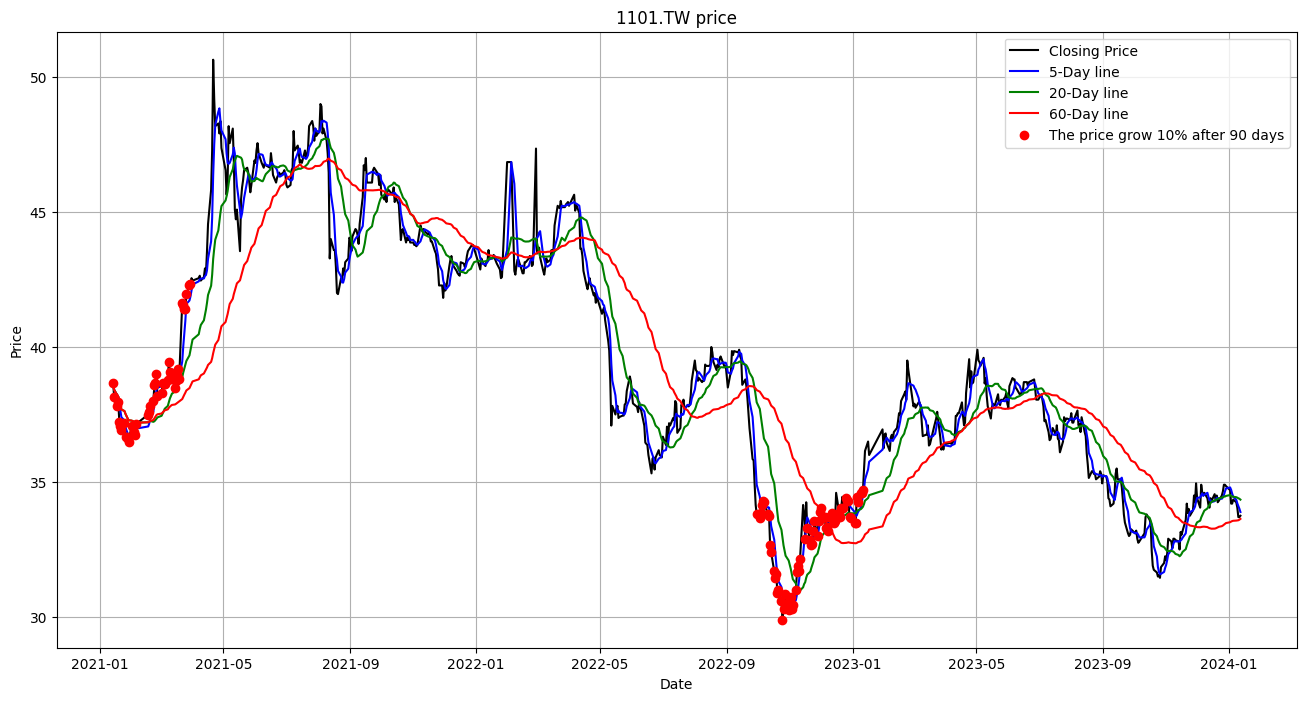

In [23]:
#畫出每日收盤價以及各均線，並標示在90天後股價比遠本高超過10%的點
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.index, df['close'], label='Closing Price', color='black')
ax.plot(df.index, df['sma_5'], label='5-Day line', color='blue')
ax.plot(df.index, df['sma_20'], label='20-Day line', color='green')
ax.plot(df.index, df['sma_60'], label='60-Day line', color='red')

target_1 = df[df['target'] == 1]
ax.scatter(target_1.index, target_1['close'], color='red', label='The price grow 10% after 90 days', zorder=5)

ax.set_title('1101.TW price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.grid(True)
plt.show()

# <h1>EDA-ACF 以及 PACF</h1>

In [24]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

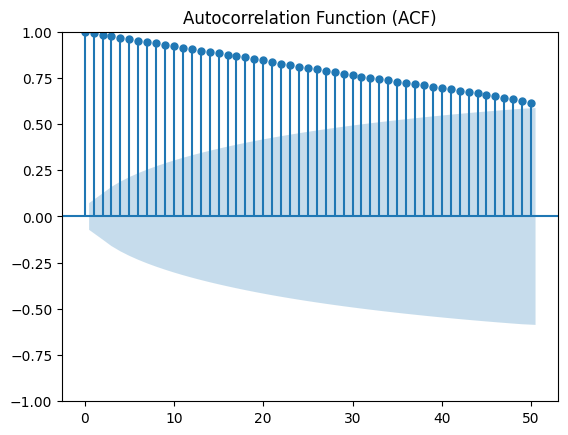

In [32]:
#計算ACF
plot_acf(df['close'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

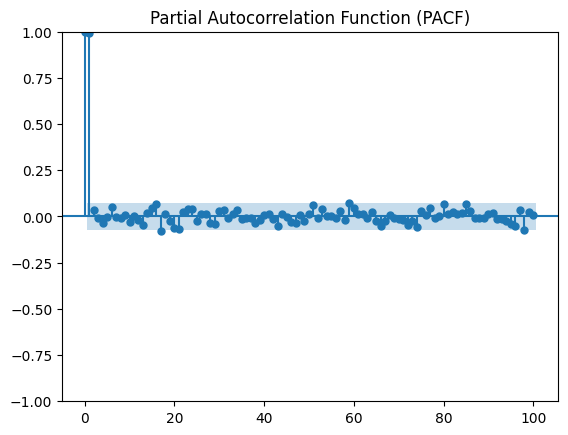

In [33]:
#計算PACF
plot_pacf(df['close'], lags=100)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller
# 檢查原始數列是否平穩
result = adfuller(df['close'])
print('ADF 檢定 p-value:', result[1])


ADF 檢定 p-value: 0.5625027681389074


# <h1>從ACF、PACF以及ADF檢定可以發現數列並不平穩，故考慮進行差分</h1>